## Import the libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import umap.umap_ as umap
from sklearn.metrics import davies_bouldin_score
%config InlineBackend.figure_format = 'svg'
import random

In [3]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway

## Import the dataset
This dataset has already been standardized

In [4]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data_with_target=pd.read_excel('/home/suhananujum/Telecom customer Preprocessed Data.xlsx')

NameError: name 'np' is not defined

In [5]:
data_with_target=data_with_target.drop(["Unnamed: 0"],axis=1)


NameError: name 'data_with_target' is not defined

In [7]:
data_with_target

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0 -1.277445             0   
1          1              0        0           0  0.066327             1   
2          1              0        0           0 -1.236724             1   
3          1              0        0           0  0.514251             0   
4          0              0        0           0 -1.236724             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              0        1           1 -0.340876             1   
7039       0              0        1           1  1.613701             1   
7040       0              0        1           1 -0.870241             0   
7041       1              1        1           0 -1.155283             1   
7042       1              0        0           0  1.369379             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2       -1.160323     -0.398608      0  
1                    0              3       -0.259629     -0.948762      0  
2                    1              3       -0.362660     -1.641883      1  
3                    0              0       -0.746535     -0.983710      0  
4                    1              2        0.197365     -1.235224      1  
...                ...            ...             ...           ...    ...  
7038                 1              3        0.665992     -0.879397      0  
7039                 1              1        1.277533      1.292099      0  
7040                 1              2       -1.168632     -0.139680      0  
7041                 1              3        0.320338     -0.316534      1  
7042                 1              0        1.358961      1.138013      0  

[7043 rows x 20 columns]

In [1]:
data=data_with_target.drop(["Churn"],axis=1)

NameError: name 'data_with_target' is not defined

In [2]:
data

NameError: name 'data' is not defined

## Necessary Functions

In [8]:
def UMAP(UMAP_neb, min_dist_UMAP, metr, data, visual):
    import umap.umap_ as umap
   
    np.random.seed(42)
    colors_set1 = ["burlywood", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    data_embedded = umap.UMAP(n_neighbors=UMAP_neb, min_dist=min_dist_UMAP, n_components=2, metric=metr, random_state=0).fit_transform(data)
    data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
    data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
    result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
    if visual==1:
        sns.lmplot( x="UMAP_0", y="UMAP_1",data=result,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) # specify the point size
        #plt.savefig('clusters_umap_all.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    return result

In [9]:
## Clustering parameters is a list of parameters for each clustering algorithms that will be unpacked inside the function
## if clustering_algorithm is DBSCAN clustering_parameters {"eps":value, "min_samples":value}
## if clustering_algorithm is KMEANS clustering_parameters {"n_clusters":value}
## if clustering_algorithm is AGGLO clustering_parameters {"n_clusters":value, "metric":value, "linkage":value}
## algo_dim_reduction has two values UMAP and FDC

def Clustering(low_d_embedding, algo_dim_reduction, clustering_parameters, clustering_algorithm, visual):
    np.random.seed(42)
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans
    from sklearn.cluster import AgglomerativeClustering
    
    colors_set1 = ["burlywood", "lightcoral", "lightseagreen", "mediumorchid", "orange",  "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    
    if clustering_algorithm=="DBSCAN":
        clustering = DBSCAN(eps=clustering_parameters["eps"], min_samples=clustering_parameters["min_samples"]).fit(low_d_embedding)
    
    elif clustering_algorithm=="KMEANS":
        clustering = KMeans(n_clusters=clustering_parameters["n_clusters"], random_state=42).fit(low_d_embedding)
    
    elif clustering_algorithm=="AGGLO":
        clustering = AgglomerativeClustering(n_clusters=clustering_parameters["n_clusters"], metric=clustering_parameters["metric"], linkage=clustering_parameters["linkage"]).fit(low_d_embedding)
        
    else:
        return (print ("Invalid Clusering Algorithm Name"))
    
    clusters=clustering.fit_predict(low_d_embedding)
    (values,counts) = np.unique(clusters,return_counts=True)
    low_d_embedding['Cluster'] = clusters
    
    
    if visual==1:
        sns.lmplot( x=algo_dim_reduction+"_0", y=algo_dim_reduction+"_1",
        data=low_d_embedding,
        fit_reg=False, 
        legend=True,
        hue='Cluster', # color by cluster
        scatter_kws={"s": 10},palette=customPalette_set1) # specify the point size
        plt.savefig(clustering_algorithm+'.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    
    cluster_labels=low_d_embedding.Cluster.to_list()
    
    if len(np.unique(np.array(cluster_labels)))>1:
        silhouette_score=silhouette_score(low_d_embedding,cluster_labels)
    else:
        silhouette_score=0
        
    return cluster_labels,counts,silhouette_score

In [10]:
def db_score(data,features):
    score=davies_bouldin_score(X=data,labels=features)
    return score

In [11]:
def parameter_optimization_UMAP_KMEANS(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        n_clusters_sample=random.choice(n_clusters)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"n_clusters":n_clusters_sample}, "KMEANS",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, n_clusters_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [12]:
def parameter_optimization_UMAP_DBSCAN(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, eps_sample, min_samples_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

## Compare UMAP and FDC for k-Means

### UMAP

In [17]:
n_neighbors = [5, 10, 20, 50, 100]
min_dist= [0.1, 0.25, 0.5, 0.8]
n_clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
records_UMAP_KMEANS= parameter_optimization_UMAP_KMEANS(10, data)

Running iteration number  1
Running iteration number  2
Running iteration number  3
Running iteration number  4
Running iteration number  5
Running iteration number  6
Running iteration number  7
Running iteration number  8
Running iteration number  9
Running iteration number  10


In [19]:
best_parameters_UMAP_KMEANS=records_UMAP_KMEANS[-1]

In [20]:
best_parameters_UMAP_KMEANS

array([100.        ,   0.1       ,  10.        ,   0.84853926])

##### Best parameter choices
UMAP
- n_neighbours=9
- min_dist=0.1

k-Means
- num_clusters=10

In [21]:
UMAP_emb=UMAP(100, 0.1, "euclidean", data, 1)

In [22]:
cluster_labels_UMAP_KMEANS,counts_UMAP_KMEANS,silhouette_score_UMAP_KMEANS=Clustering(UMAP_emb, "UMAP", {"n_clusters":10}, "KMEANS", 1)

In [23]:
print("Sihouette Score K-Means-UMAP", silhouette_score_UMAP_KMEANS)

Sihouette Score K-Means-UMAP 0.8485392644703845


## Compare UMAP and FDC for DBSCAN

### UMAP

In [24]:
n_neighbors = [6, 9, 12, 15, 18, 21, 24, 27, 30]
min_dist= [0.001, 0.01, 0.1, 0.25, 0.5, 0.8]
eps=[0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
min_samples=[5, 10, 20, 30]

In [25]:
records_UMAP_DBSCAN= parameter_optimization_UMAP_DBSCAN(20, data)

Running iteration number  1
Running iteration number  2
Running iteration number  3
Running iteration number  4
Running iteration number  5
Running iteration number  6
Running iteration number  7
Running iteration number  8
Running iteration number  9
Running iteration number  10
Running iteration number  11
Running iteration number  12
Running iteration number  13
Running iteration number  14
Running iteration number  15
Running iteration number  16
Running iteration number  17
Running iteration number  18
Running iteration number  19
Running iteration number  20


In [26]:
best_parameters_UMAP_DBSCAN=records_UMAP_DBSCAN[-1]

In [27]:
best_parameters_UMAP_DBSCAN

array([6.00000000e+00, 1.00000000e-03, 5.00000000e-02, 1.00000000e+01,
       9.36724741e-01])

##### Best parameter choices
UMAP
- n_neighbours=21
- min_dist=0.01

DBSCAN
- eps=0.1
- min_samples=10

In [28]:
UMAP_emb=UMAP(6, 0.001, "euclidean", data, 1)

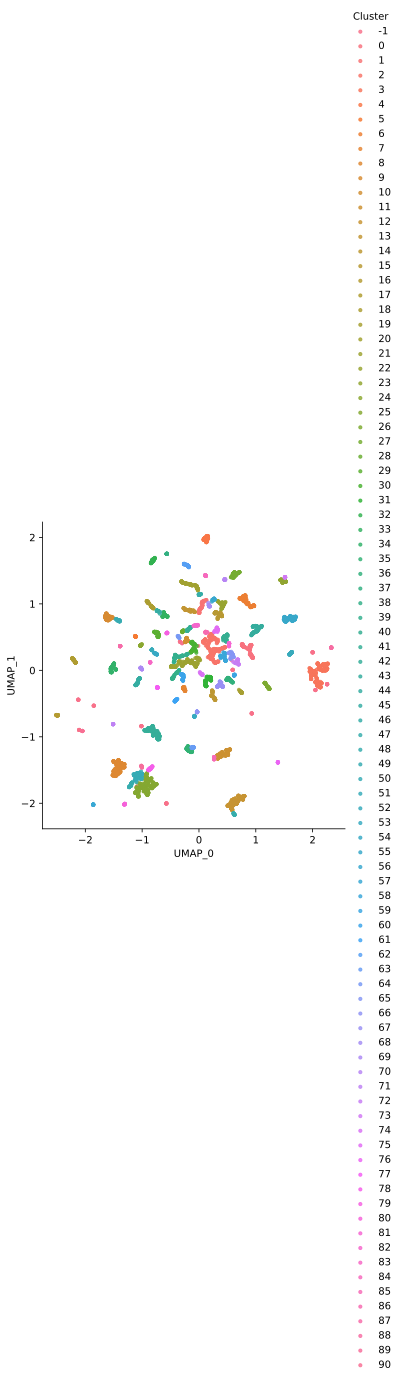

In [29]:
cluster_labels_UMAP_DBSCAN,counts_UMAP_DBSCAN,silhouette_score_UMAP_DBSCAN=Clustering(UMAP_emb, "UMAP", {"eps":0.05,"min_samples":10}, "DBSCAN", 1)